In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.read_

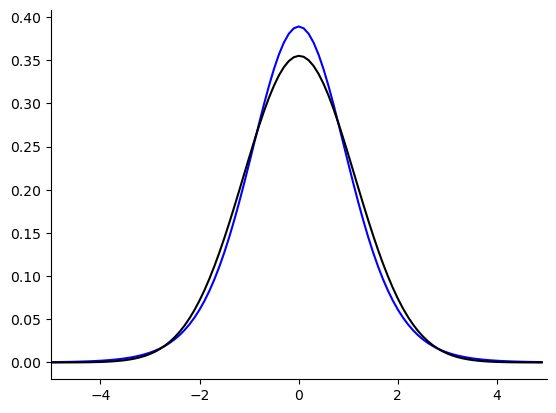

In [2]:
x = np.arange(-5, 5, 0.1)
tdist = stats.t(df=10)

y_t = tdist.pdf(x)
y_norm = stats.norm(*stats.norm.fit(tdist.rvs(10_000))).pdf(x)

fig, ax = plt.subplots()
ax.plot(x, y_t, color="blue")
ax.plot(x, y_norm, color="k")
ax.set_xlim(-5, 5)
sns.despine()

# Analytical Test

In [5]:
df = sns.load_dataset("tips")
male = df.query("sex == 'Male'")["tip"].values
female = df.query("sex == 'Female'")["tip"].values

In [6]:
diff_in_means = male.mean() - female.mean()
pooled_sd = np.hstack([male, female]).std()
SE = pooled_sd * np.sqrt(1/len(male) + 1/len(female))

print(f"{diff_in_means = :.3f}")
print(f"{pooled_sd = :.3f}")
print(f"{SE = :.3f}")
print(f"{diff_in_means / SE = :.4f}")



diff_in_means = 0.256
pooled_sd = 1.381
SE = 0.185
diff_in_means / SE = 1.3881


In [7]:
stats.ttest_ind(male, female, alternative="greater")

Ttest_indResult(statistic=1.387859705421269, pvalue=0.08322811751728378)

# Resampling Test

<AxesSubplot:ylabel='Density'>

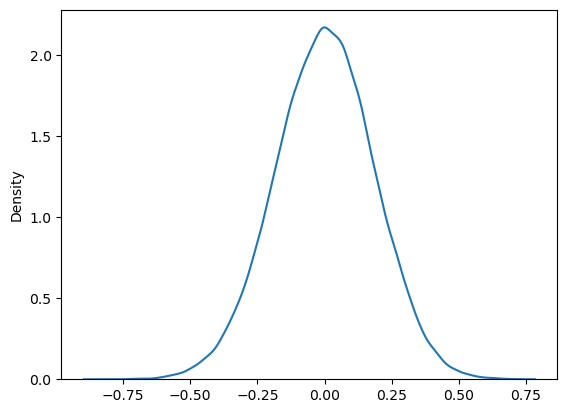

In [8]:
all_ppl = np.hstack([male, female])

re_male = np.random.choice(all_ppl, size=(100_000, len(male)))
re_female = np.random.choice(all_ppl, size=(100_000, len(female)))

diffs = re_male.mean(axis=1) - re_female.mean(axis=1)
sns.kdeplot(diffs)


In [99]:
(diffs > diff_in_means).mean()

0.08119

In [100]:
1 - stats.rv_histogram(np.histogram(diffs, bins=50)).cdf(diff_in_means)

0.08171264874269257